In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Get the current working directory
cwd = os.getcwd()
# Specify a relative path from the current working directory
relative_path = os.path.join(cwd, 'data/uatom-balance.csv')

# CSV 파일을 DataFrame으로 읽어온다. 필요한 열만 포함시킨다.
df = pd.read_csv(relative_path, usecols=['_time', 'denom', 'moduleName', 'moduleType', 'amountValue'])

# '_time' 열을 datetime 형식으로 변환한다.
df['_time'] = pd.to_datetime(df['_time'])

# '_time' 열을 인덱스로 설정한다.
df.set_index('_time', inplace=True)

# 누락된 값(-1)을 NaN으로 대체한다.
df.replace(-1, np.nan, inplace=True)

# 각 열에 대한 요약 통계량을 계산한다.
summary_stats = df.describe()

# 요약 통계량을 출력한다.
print(summary_stats)

        amountValue
count  9.437600e+04
mean   5.325200e+12
std    2.940190e+13
min    4.300000e+01
25%    4.967000e+06
50%    7.531833e+08
75%    3.640000e+11
max    2.310000e+14


/var/folders/rs/451vhmx909jbf4784zj52l980000gn/T/ipykernel_33656/398408252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modulename.replace(-1, np.nan, inplace=True)


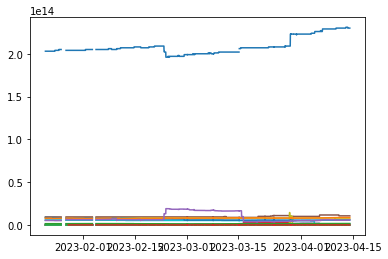

In [19]:
# 데이터 전처리: 필요한 변수만 선택하고 -1을 NaN으로 대체
df_modulename = df[['moduleName', 'amountValue']]
df_modulename.replace(-1, np.nan, inplace=True)

# 각 모듈별로 amountValue의 시계열 그래프 그리기
for module, group in df_modulename.groupby('moduleName'):
    plt.plot(group['amountValue'], label=module)

In [ ]:
# 각 열의 누락되지 않은 값을 요약 통계량에 추가한다.
summary_stats.loc['count'] = df.count()

# 요약 통계량을 출력한다.
print(summary_stats)

# 'modulename' 및 'moduleType'별 'amountValue' 변수에 대한 시계열 플롯을 생성한다.
df_modulename = df.loc[:, ['moduleName', 'amountValue']]
df_moduleType = df.loc[:, ['moduleType', 'amountValue']]

plt.plot(df_modulename['amountValue'])
plt.xlabel('time')
plt.ylabel('value')
plt.title('by name')
plt.show()

plt.plot(df_moduleType['amountValue'])
plt.xlabel('time')
plt.ylabel('value')
plt.title('by time')
plt.show()